In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

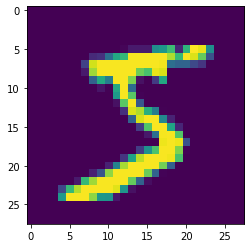

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,num_classes = 10)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255

In [21]:
x_test = x_test/255

In [22]:
scaled_image = x_train[0]

In [23]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
scaled_image.max()

1.0

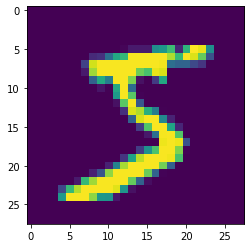

In [25]:
plt.imshow(scaled_image)

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_train = x_train.reshape(60000,28,28,1)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
    
model.add(Dense(128, activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [35]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test,y_cat_test),
         callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2946 - accuracy: 0.9141 - val_loss: 0.0575 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0521 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0562 - val_accuracy: 0.9808


In [36]:
metrics = pd.DataFrame(model.history.history)

In [37]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.147378,0.956133,0.057536,0.9815
1,0.049862,0.984617,0.052112,0.9835
2,0.031878,0.989900,0.056211,0.9808


<AxesSubplot:>

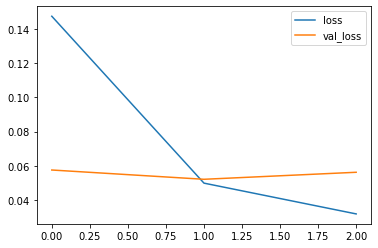

In [38]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

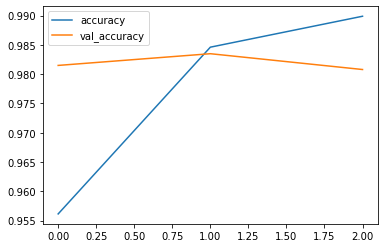

In [39]:
metrics[['accuracy','val_accuracy']].plot()

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
model.evaluate(x_test,y_cat_test,verbose = 0)

[0.056210584938526154, 0.9807999730110168]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
predictions = model.predict_classes(x_test)          

C:\Users\shahm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
y_cat_test.shape

(10000, 10)

In [45]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.97      0.98      1032
           3       1.00      0.98      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.96      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.93      1.00      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [47]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    0,    0,    0,    1,    3,    0,    1,    1],
       [   1, 1108,    2,    1,    1,    2,    3,    2,   15,    0],
       [   2,    2,  999,    1,    0,    0,    2,    5,   20,    1],
       [   0,    0,    1,  988,    0,   13,    0,    0,    6,    2],
       [   1,    0,    0,    0,  956,    0,    6,    3,    6,   10],
       [   2,    0,    0,    1,    0,  886,    2,    0,    1,    0],
       [   3,    1,    0,    0,    1,    3,  946,    0,    4,    0],
       [   1,    1,    5,    0,    0,    1,    0, 1005,    5,   10],
       [   2,    0,    0,    0,    0,    1,    0,    0,  971,    0],
       [   3,    1,    0,    0,    1,   13,    0,    3,   13,  975]],
      dtype=int64)

In [48]:
import seaborn as sns

<AxesSubplot:>

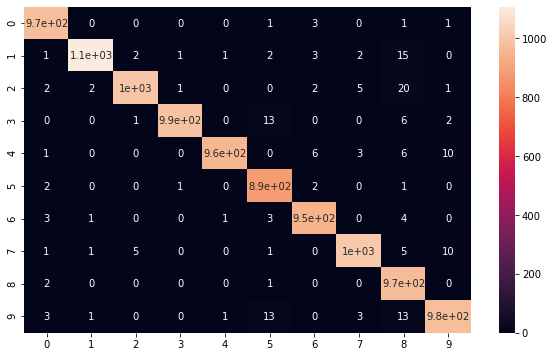

In [49]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [50]:
my_number = x_test[0]

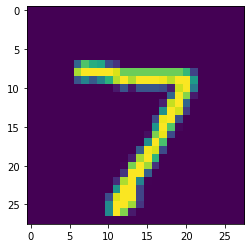

In [51]:
plt.imshow(my_number.reshape(28,28))

In [52]:
model.predict_classes(my_number.reshape(1,28,28,1))

C:\Users\shahm\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7], dtype=int64)